In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# 1. Đọc dữ liệu
data = pd.read_csv("D:/ML_water_quality/dataset/water_potability.csv")

# 2. Xử lý giá trị thiếu (sử dụng phương pháp điền giá trị trung vị cho tất cả các cột số)
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 3. Phân tách dữ liệu thành đặc trưng (X) và nhãn (y)
X = data_imputed.drop('Potability', axis=1)  # Các cột đặc trưng
y = data_imputed['Potability']  # Cột nhãn (Potability)

# 4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Chuẩn hóa dữ liệu (Standardize)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Xây dựng mô hình Decision Tree(CART)
model = DecisionTreeClassifier(random_state=42)

# 7. Huấn luyện mô hình với dữ liệu huấn luyện
model.fit(X_train, y_train)

# 8. Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# 9. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# In classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# In confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 57.62%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65       412
         1.0       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656


Confusion Matrix:
[[254 158]
 [120 124]]


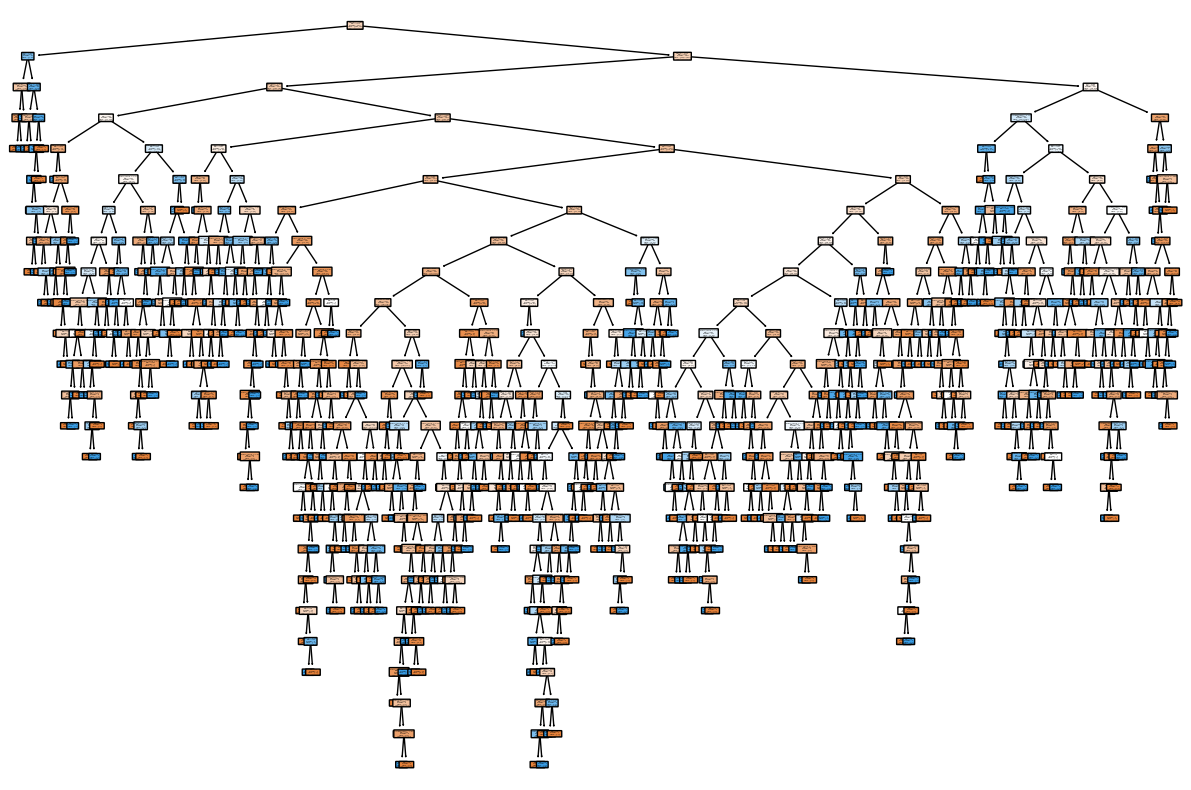

In [22]:
# Hiển thị cây quyết định
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Potable', 'Potable'], rounded=True, proportion=False)
plt.show()